In [1]:
cd ..

/Users/joeranbosma/stack/Projects/M5Forecast/uncertainty


In [2]:
cd ..

/Users/joeranbosma/stack/Projects/M5Forecast


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, gc
import matplotlib.pyplot as plt

# own imports
from evaluation import Referee, load_data, select_dates, select_day_nums
from train import get_chronological_train_val_split, get_train_val_slit, train_lightgbm_model

# Setup file paths
data_dir = 'data/'
os.environ['DATA_DIR'] = data_dir
sub_dir = 'submissions_uncertainty/'
plt.rcParams['font.size'] = 13

# Hardcode requested quantiles
quantiles = [0.005, 0.025, 0.165, 0.25, 0.5, 0.75, 0.835, 0.975, 0.995]

/Users/joeranbosma/opt/anaconda3/envs/cart/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/joeranbosma/opt/anaconda3/envs/cart/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/joeranbosma/opt/anaconda3/envs/cart/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/joeranbosma/opt

# Train LightGBM - multiple levels - 5-fold chronological cross-validation

In [4]:
model_dir = 'models/uncertainty/train_lightgbm/run1/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

## Define model architectures

In [5]:
params = {
    'boosting_type': 'gbdt',
    'metric': 'mae',
    'objective': 'regression',
    'n_jobs': -1,
    'seed': 236,
    'learning_rate': 0.1,
    'bagging_fraction': 0.75,
    'bagging_freq': 10,
    'colsample_bytree': 0.75}

## Perform training scheme

========== Starting level 1 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2015-03-16 04:48:00 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.049644
Early stopping, best iteration is:
[44]	valid_0's l1: 0.0493934


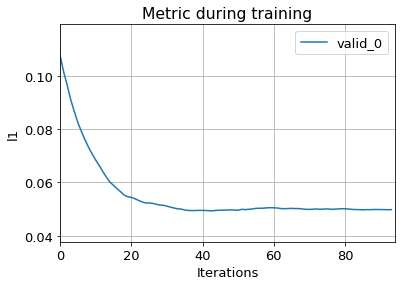

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2014-03-04 09:36:00 and 2015-03-16 04:48:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0314648
[100]	valid_0's l1: 0.0303645
Early stopping, best iteration is:
[73]	valid_0's l1: 0.0298529


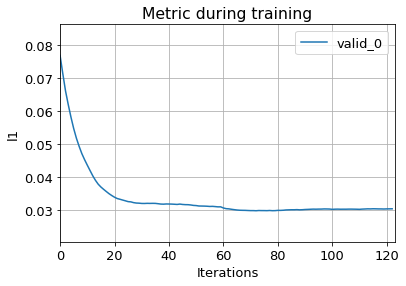

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2013-02-20 14:24:00 and 2014-03-04 09:36:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0351158
[100]	valid_0's l1: 0.0345754
[150]	valid_0's l1: 0.0343509
Early stopping, best iteration is:
[133]	valid_0's l1: 0.0342514


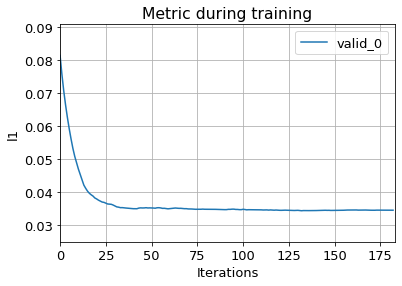

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2012-02-09 19:12:00 and 2013-02-20 14:24:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0357032
[100]	valid_0's l1: 0.034778
Early stopping, best iteration is:
[80]	valid_0's l1: 0.0344774


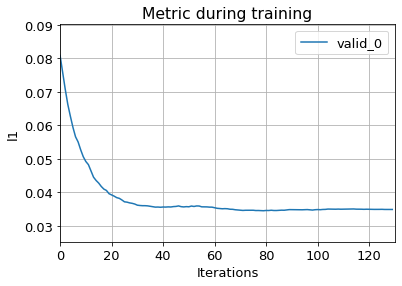

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2011-01-29 00:00:00 and 2012-02-09 19:12:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0707909
Early stopping, best iteration is:
[49]	valid_0's l1: 0.0707565


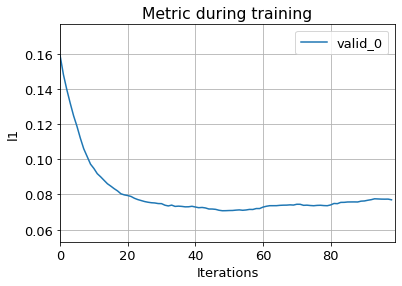

========== Starting level 2 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2015-03-16 04:48:00 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0356946
[100]	valid_0's l1: 0.0343413
[150]	valid_0's l1: 0.0343013
Early stopping, best iteration is:
[121]	valid_0's l1: 0.033977


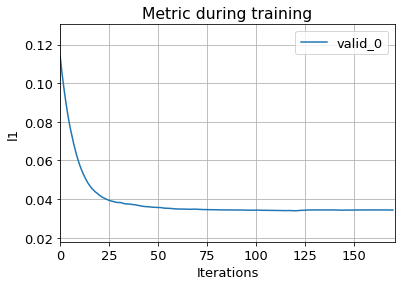

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2014-03-04 09:36:00 and 2015-03-16 04:48:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0283865
[100]	valid_0's l1: 0.027284
[150]	valid_0's l1: 0.0267839
[200]	valid_0's l1: 0.0264995
[250]	valid_0's l1: 0.0262115
[300]	valid_0's l1: 0.0261881
Early stopping, best iteration is:
[266]	val

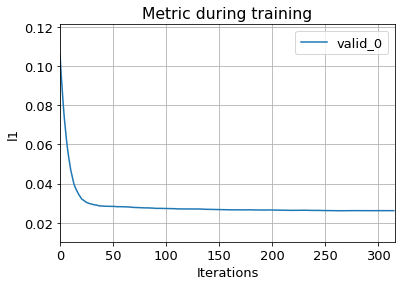

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2013-02-20 14:24:00 and 2014-03-04 09:36:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0301848
[100]	valid_0's l1: 0.0291118
[150]	valid_0's l1: 0.0289122
Early stopping, best iteration is:
[132]	valid_0's l1: 0.0287358


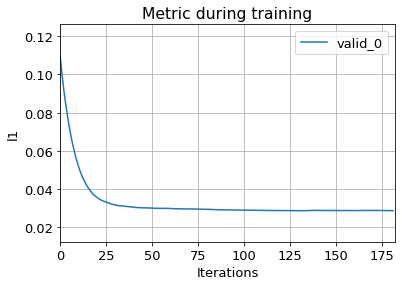

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2012-02-09 19:12:00 and 2013-02-20 14:24:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0304352
[100]	valid_0's l1: 0.0297613
[150]	valid_0's l1: 0.0294831
[200]	valid_0's l1: 0.0291889
[250]	valid_0's l1: 0.0291417
[300]	valid_0's l1: 0.0290423
[350]	valid_0's l1: 0.0290153
Early stoppin

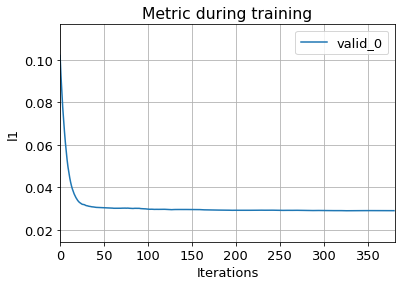

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2011-01-29 00:00:00 and 2012-02-09 19:12:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0446882
[100]	valid_0's l1: 0.0451599
Early stopping, best iteration is:
[60]	valid_0's l1: 0.0438592


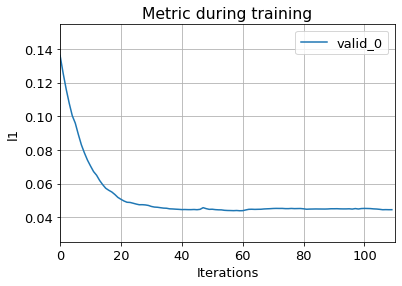

========== Starting level 3 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2015-03-16 04:48:00 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0287665
[100]	valid_0's l1: 0.0279615
[150]	valid_0's l1: 0.027448
[200]	valid_0's l1: 0.0274343
Early stopping, best iteration is:
[190]	valid_0's l1

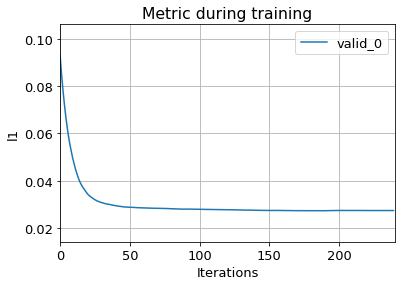

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2014-03-04 09:36:00 and 2015-03-16 04:48:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0262454
[100]	valid_0's l1: 0.0257883
[150]	valid_0's l1: 0.0253694
[200]	valid_0's l1: 0.0251586
[250]	valid_0's l1: 0.0250424
[300]	valid_0's l1: 0.0249099
Early stopping, best iteration 

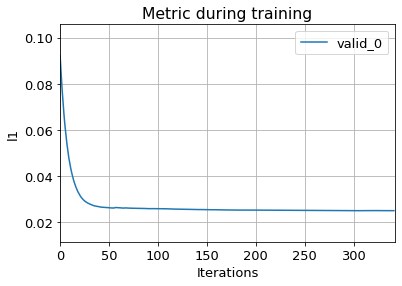

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2013-02-20 14:24:00 and 2014-03-04 09:36:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0265517
[100]	valid_0's l1: 0.0256575
[150]	valid_0's l1: 0.0253466
[200]	valid_0's l1: 0.0252566
[250]	valid_0's l1: 0.0251249
[300]	valid_0's l1: 0.0251032
[350]	valid_0's l1: 0.0249693
E

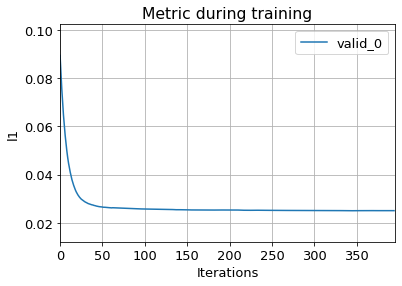

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2012-02-09 19:12:00 and 2013-02-20 14:24:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.027816
[100]	valid_0's l1: 0.0269837
[150]	valid_0's l1: 0.0265621
[200]	valid_0's l1: 0.026405
[250]	valid_0's l1: 0.0261191
[300]	valid_0's l1: 0.0260589
[350]	valid_0's l1: 0.0260458
Ear

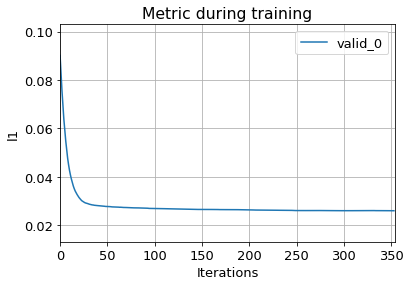

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2011-01-29 00:00:00 and 2012-02-09 19:12:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0305045
[100]	valid_0's l1: 0.0303247
[150]	valid_0's l1: 0.0304184
Early stopping, best iteration is:
[137]	valid_0's l1: 0.0298063


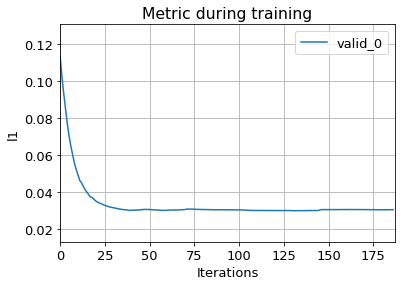

========== Starting level 4 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2015-03-16 04:48:00 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0308582
[100]	valid_0's l1: 0.0301646
Early stopping, best iteration is:
[69]	valid_0's l1: 0.0300114


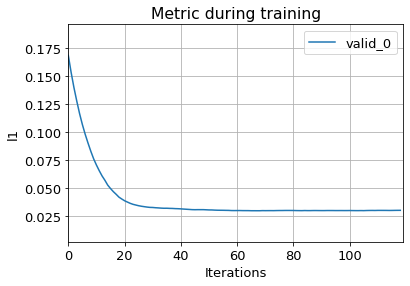

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2014-03-04 09:36:00 and 2015-03-16 04:48:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0213122
[100]	valid_0's l1: 0.0208372
[150]	valid_0's l1: 0.020708
[200]	valid_0's l1: 0.0206464
[250]	valid_0's l1: 0.0205022
[300]	valid_0's l1: 0.0204901
Early stopping, best iteration is:
[267]	valid

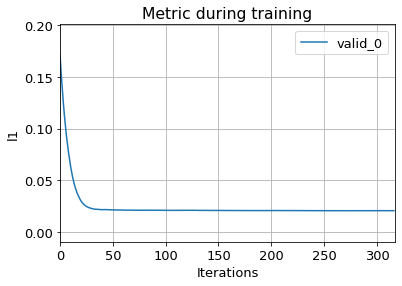

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2013-02-20 14:24:00 and 2014-03-04 09:36:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0243096
[100]	valid_0's l1: 0.0237734
[150]	valid_0's l1: 0.0237656
[200]	valid_0's l1: 0.0235015
[250]	valid_0's l1: 0.0234544
Early stopping, best iteration is:
[220]	valid_0's l1: 0.0234199


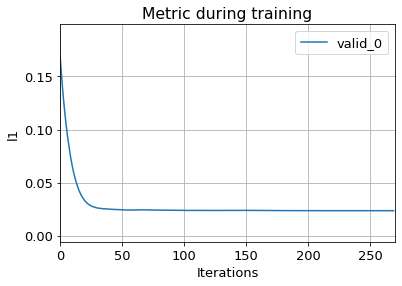

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2012-02-09 19:12:00 and 2013-02-20 14:24:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0252018
[100]	valid_0's l1: 0.0241021
[150]	valid_0's l1: 0.024009
[200]	valid_0's l1: 0.0238724
[250]	valid_0's l1: 0.0237759
[300]	valid_0's l1: 0.0236677
[350]	valid_0's l1: 0.0236162
[400]	valid_0's 

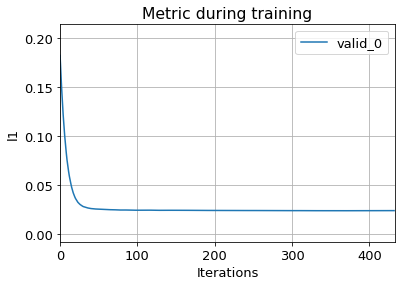

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2011-01-29 00:00:00 and 2012-02-09 19:12:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0264608
[100]	valid_0's l1: 0.0265437
Early stopping, best iteration is:
[63]	valid_0's l1: 0.0260425


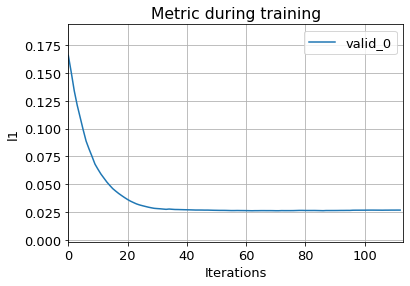

========== Starting level 5 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2015-03-16 04:48:00 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0216218
[100]	valid_0's l1: 0.0211048
[150]	valid_0's l1: 0.0205844
[200]	valid_0's l1: 0.0205914
[250]	valid_0's l1: 0.020435
[300]	valid_0's l1: 0.0204

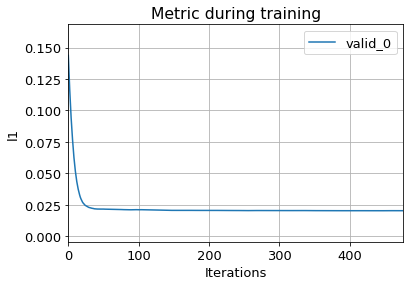

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:36:00 and 2015-03-16 04:48:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0182075
[100]	valid_0's l1: 0.0178108
[150]	valid_0's l1: 0.0175441
[200]	valid_0's l1: 0.0174315
[250]	valid_0's l1: 0.0172966
[300]	valid_0's l1: 0.0172228
[350]	valid_0's l1: 0.0172001
[400

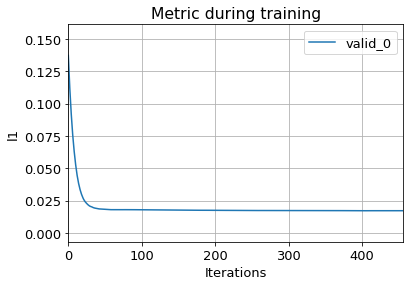

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:24:00 and 2014-03-04 09:36:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0199738
[100]	valid_0's l1: 0.019599
[150]	valid_0's l1: 0.0194008
[200]	valid_0's l1: 0.0193703
[250]	valid_0's l1: 0.0193001
Early stopping, best iteration is:
[247]	valid_0's l1: 0.0192852


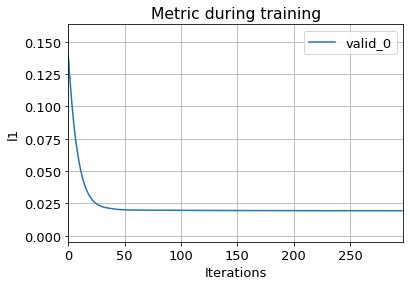

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:12:00 and 2013-02-20 14:24:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0214957
[100]	valid_0's l1: 0.0207434
[150]	valid_0's l1: 0.020692
Early stopping, best iteration is:
[130]	valid_0's l1: 0.0206354


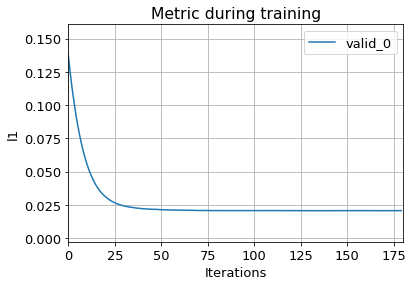

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-29 00:00:00 and 2012-02-09 19:12:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0279605
[100]	valid_0's l1: 0.0267615
Early stopping, best iteration is:
[95]	valid_0's l1: 0.0266571


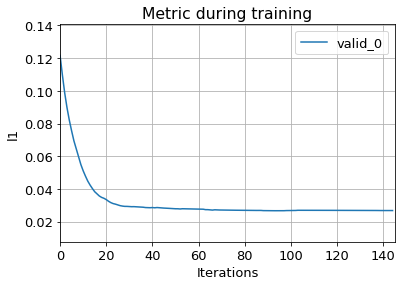

========== Starting level 6 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2015-03-16 04:48:00 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.022512
[100]	valid_0's l1: 0.0216465
[150]	valid_0's l1: 0.0215226
[200]	valid_0's l1: 0.0213885
[250]	valid_0's l1: 0.0213581
Early stopping, best iter

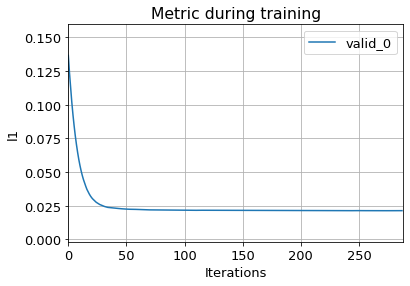

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2014-03-04 09:36:00 and 2015-03-16 04:48:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.019347
[100]	valid_0's l1: 0.0186622
[150]	valid_0's l1: 0.0185024
[200]	valid_0's l1: 0.0184057
[250]	valid_0's l1: 0.0183382
[300]	valid_0's l1: 0.0183556
Early stopping, best iteration is:

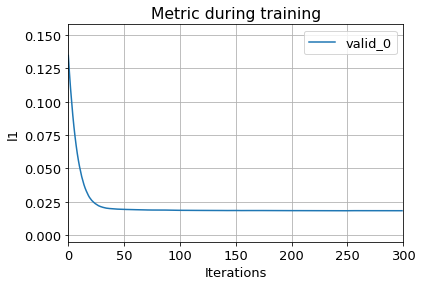

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2013-02-20 14:24:00 and 2014-03-04 09:36:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0221325
[100]	valid_0's l1: 0.0212501
[150]	valid_0's l1: 0.0211421
[200]	valid_0's l1: 0.0210074
[250]	valid_0's l1: 0.020844
[300]	valid_0's l1: 0.0207977
Early stopping, best iteration is:

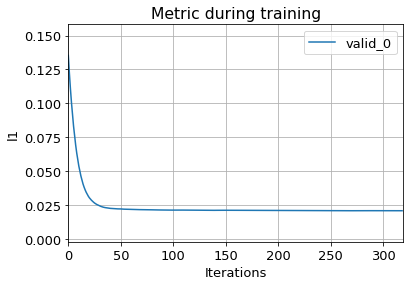

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2012-02-09 19:12:00 and 2013-02-20 14:24:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0231885
[100]	valid_0's l1: 0.022273
[150]	valid_0's l1: 0.0220064
[200]	valid_0's l1: 0.0219435
Early stopping, best iteration is:
[192]	valid_0's l1: 0.0219127


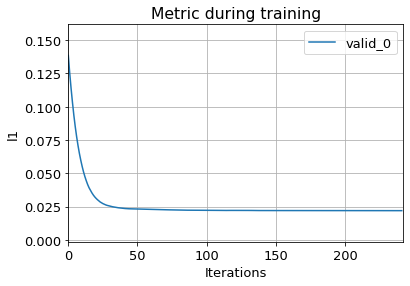

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2011-01-29 00:00:00 and 2012-02-09 19:12:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0267506
[100]	valid_0's l1: 0.0249858
[150]	valid_0's l1: 0.0244424
[200]	valid_0's l1: 0.0241338
[250]	valid_0's l1: 0.0240505
[300]	valid_0's l1: 0.024056
Early stopping, best iteration is:

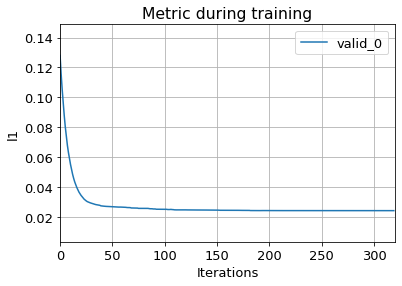

========== Starting level 7 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2015-03-16 04:48:00 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0172002
[100]	valid_0's l1: 0.0168437
[150]	valid_0's l1: 0.0167722
[200]	valid_0's l1: 0.016696
Early stopping, best iteration is:
[197]	val

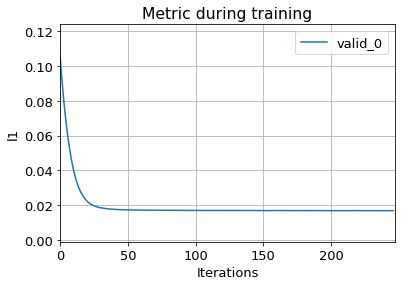

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:36:00 and 2015-03-16 04:48:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0152438
[100]	valid_0's l1: 0.0147555
[150]	valid_0's l1: 0.0145293
[200]	valid_0's l1: 0.014376
[250]	valid_0's l1: 0.014306
[300]	valid_0's l1: 0.0141887
[350]	valid_0's l1: 0.01

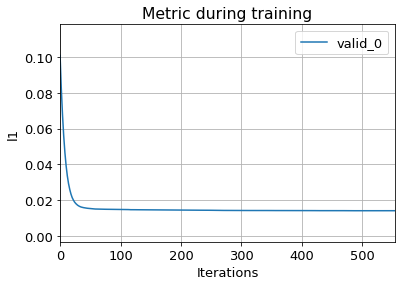

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:24:00 and 2014-03-04 09:36:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0169127
[100]	valid_0's l1: 0.0161556
[150]	valid_0's l1: 0.0161219
[200]	valid_0's l1: 0.0160152
[250]	valid_0's l1: 0.0160536
[300]	valid_0's l1: 0.0159999
Early stopping, best i

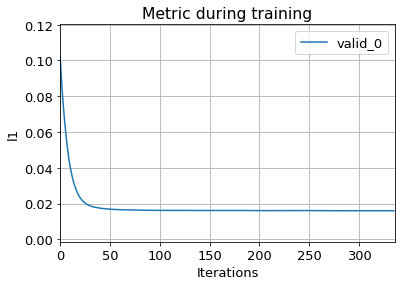

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:12:00 and 2013-02-20 14:24:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0171866
[100]	valid_0's l1: 0.016355
[150]	valid_0's l1: 0.0162369
[200]	valid_0's l1: 0.0161735
[250]	valid_0's l1: 0.0160983
[300]	valid_0's l1: 0.0160513
[350]	valid_0's l1: 0.0

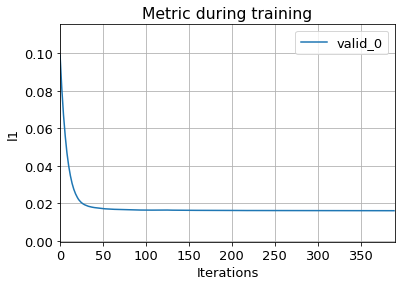

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-29 00:00:00 and 2012-02-09 19:12:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0205673
[100]	valid_0's l1: 0.01895
[150]	valid_0's l1: 0.0185246
[200]	valid_0's l1: 0.018436
[250]	valid_0's l1: 0.0183501
[300]	valid_0's l1: 0.0182684
[350]	valid_0's l1: 0.018

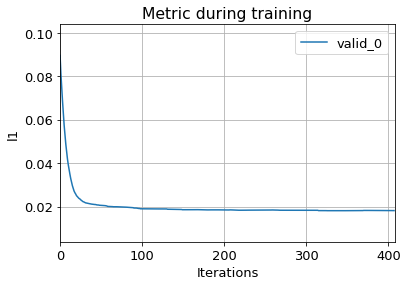

========== Starting level 8 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2015-03-16 04:48:00 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0208643
[100]	valid_0's l1: 0.020281
[150]	valid_0's l1: 0.0201267
[200]	valid_0's l1: 0.0199427
[250]	valid_0's l1: 0.0198391
[300]	valid_

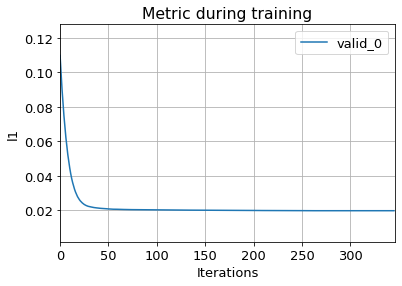

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2014-03-04 09:36:00 and 2015-03-16 04:48:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0183845
[100]	valid_0's l1: 0.0177521
[150]	valid_0's l1: 0.0175433
[200]	valid_0's l1: 0.0173718
[250]	valid_0's l1: 0.0172644
Early stopping, best iteration is:
[242]	valid_0's

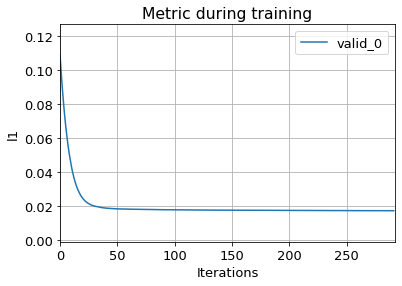

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2013-02-20 14:24:00 and 2014-03-04 09:36:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.019549
[100]	valid_0's l1: 0.0190122
[150]	valid_0's l1: 0.0188746
[200]	valid_0's l1: 0.0187756
[250]	valid_0's l1: 0.0187291
[300]	valid_0's l1: 0.0187164
Early stopping, best 

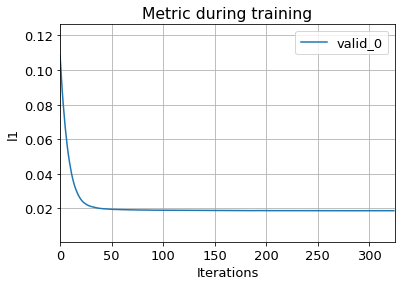

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2012-02-09 19:12:00 and 2013-02-20 14:24:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0197308
[100]	valid_0's l1: 0.0191596
[150]	valid_0's l1: 0.0189183
[200]	valid_0's l1: 0.0187949
[250]	valid_0's l1: 0.0187279
[300]	valid_0's l1: 0.0186557
[350]	valid_0's l1: 

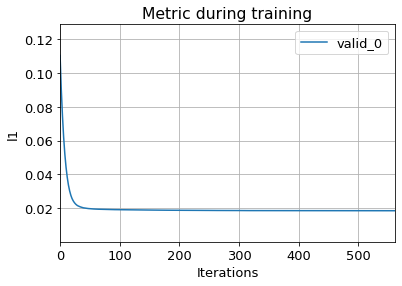

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2011-01-29 00:00:00 and 2012-02-09 19:12:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0222298
[100]	valid_0's l1: 0.0218408
[150]	valid_0's l1: 0.0216319
[200]	valid_0's l1: 0.0212775
[250]	valid_0's l1: 0.02142
Early stopping, best iteration is:
[210]	valid_0's l

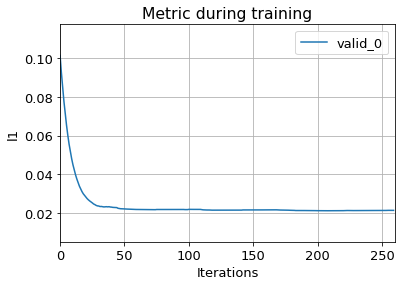

========== Starting level 9 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2015-03-16 04:48:00 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0145746
[100]	valid_0's l1: 0.0142778
[150]	valid_0's l1: 0.0141793
[200]	valid_0's l1: 0.0140626
[250]	valid_0's l1: 0.014012
[3

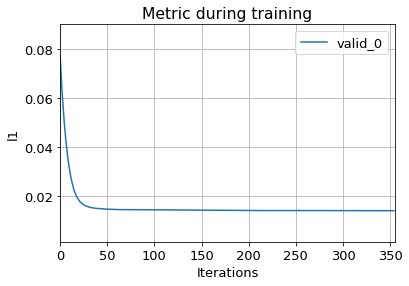

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:36:00 and 2015-03-16 04:48:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0132239
[100]	valid_0's l1: 0.0129806
[150]	valid_0's l1: 0.0128925
[200]	valid_0's l1: 0.0127698
[250]	valid_0's l1: 0.0127108
[300]	valid_0's l1: 0.012632
[350]	valid

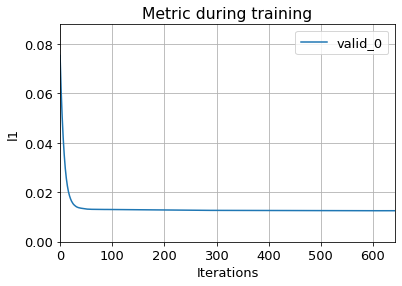

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:24:00 and 2014-03-04 09:36:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0140892
[100]	valid_0's l1: 0.0136638
[150]	valid_0's l1: 0.0135527
[200]	valid_0's l1: 0.0134485
[250]	valid_0's l1: 0.0134047
[300]	valid_0's l1: 0.0133623
[350]	vali

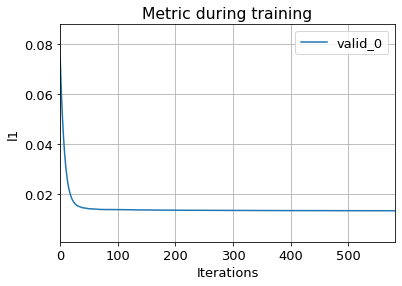

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:12:00 and 2013-02-20 14:24:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0143442
[100]	valid_0's l1: 0.0138924
[150]	valid_0's l1: 0.0137636
[200]	valid_0's l1: 0.0137365
[250]	valid_0's l1: 0.013638
[300]	valid_0's l1: 0.0135699
[350]	valid

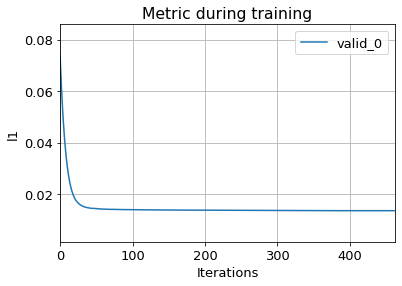

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-29 00:00:00 and 2012-02-09 19:12:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0147567
[100]	valid_0's l1: 0.0145932
Early stopping, best iteration is:
[83]	valid_0's l1: 0.0144315


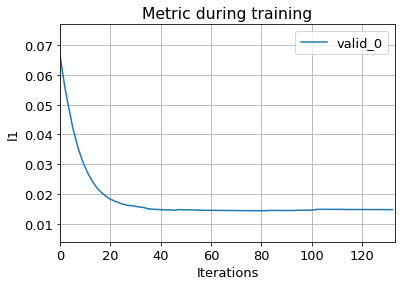

In [7]:
for level in range(1, 1+9):
    print("========== Starting level {} ==========".format(level))
    for fold in range(1, 1+5):
        print("== Starting fold {} ==".format(fold))
        # train
        model, evals_result, val = train_lightgbm_model(level, fold=fold, params=params, model_dir=model_dir)

========== Starting level 10 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2015-03-16 04:48:00 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00223204
[100]	valid_0's l1: 0.00219906
[150]	valid_0's l1: 0.00219203
[200]	valid_0's l1: 0.00218593
[250]	valid_0's l1: 0.00218305
[300]	va

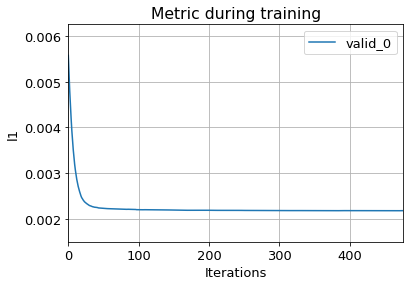

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:36:00 and 2015-03-16 04:48:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00206681
[100]	valid_0's l1: 0.0020346
[150]	valid_0's l1: 0.00202224
[200]	valid_0's l1: 0.00201707
[250]	valid_0's l1: 0.00201437
[300]	valid_0's l1: 0.00201283
[350]	valid_0's l1

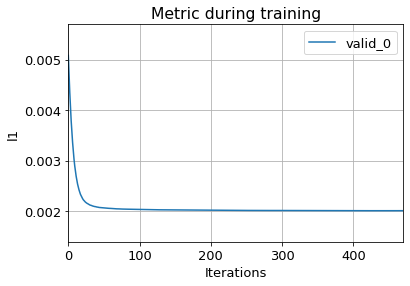

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:24:00 and 2014-03-04 09:36:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00197985
[100]	valid_0's l1: 0.00193013
[150]	valid_0's l1: 0.00191989
[200]	valid_0's l1: 0.00191031
[250]	valid_0's l1: 0.00190636
[300]	valid_0's l1: 0.00190314
[350]	valid_0's l

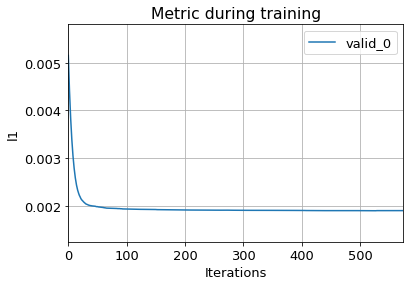

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:12:00 and 2013-02-20 14:24:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0017148
[100]	valid_0's l1: 0.00166597
[150]	valid_0's l1: 0.00166053
[200]	valid_0's l1: 0.00165562
[250]	valid_0's l1: 0.00164573
[300]	valid_0's l1: 0.001644
[350]	valid_0's l1: 

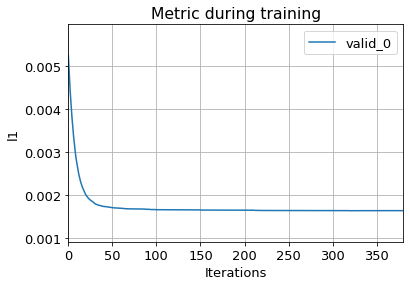

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-29 00:00:00 and 2012-02-09 19:12:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00175548
Early stopping, best iteration is:
[45]	valid_0's l1: 0.00174878


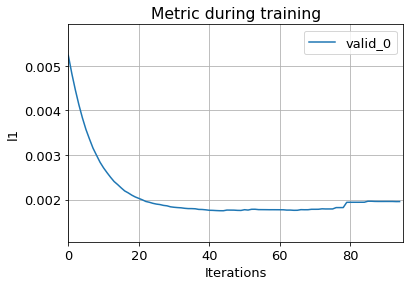

========== Starting level 11 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2015-03-16 04:48:00 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00106485
[100]	valid_0's l1: 0.00104837
[150]	valid_0's l1: 0.00104517
[200]	valid_0's l1: 0.00104288
[250]	valid_0's l1: 0.00104

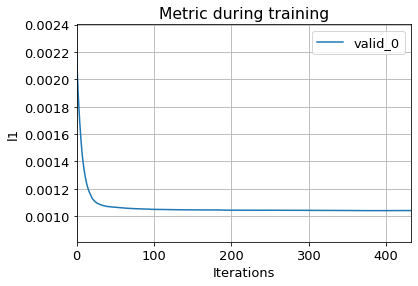

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:36:00 and 2015-03-16 04:48:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000943064
[100]	valid_0's l1: 0.000926939
[150]	valid_0's l1: 0.000922338
[200]	valid_0's l1: 0.000919745
[250]	valid_0's l1: 0.000918346
[300]	valid_0's l1: 0.000917421

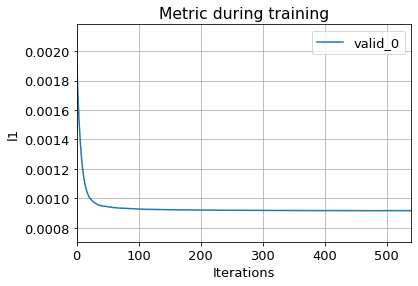

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:24:00 and 2014-03-04 09:36:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000904249
[100]	valid_0's l1: 0.000885039
[150]	valid_0's l1: 0.000879885
[200]	valid_0's l1: 0.000878041
[250]	valid_0's l1: 0.00087434
[300]	valid_0's l1: 0.00087314
[

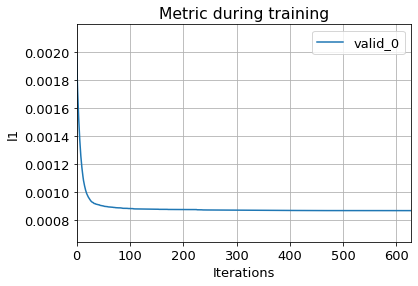

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:12:00 and 2013-02-20 14:24:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000802932
[100]	valid_0's l1: 0.000781624
[150]	valid_0's l1: 0.000775831
[200]	valid_0's l1: 0.000772691
[250]	valid_0's l1: 0.000770372
[300]	valid_0's l1: 0.000769182

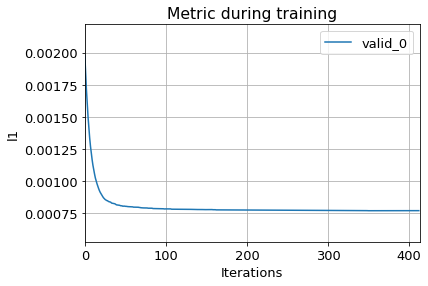

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-29 00:00:00 and 2012-02-09 19:12:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000758478
[100]	valid_0's l1: 0.000832083
Early stopping, best iteration is:
[53]	valid_0's l1: 0.000757926


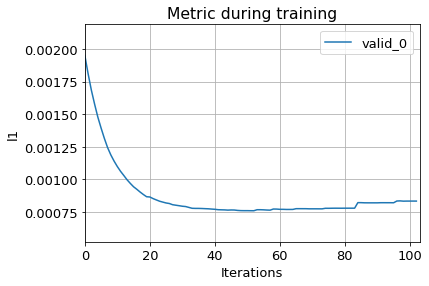

========== Starting level 12 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-03-16 04:48:00 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000639087
[100

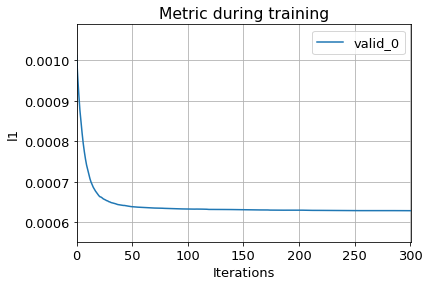

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-03-04 09:36:00 and 2015-03-16 04:48:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000552947
[100]	valid_0's l1: 0.000544817
[150]	valid_

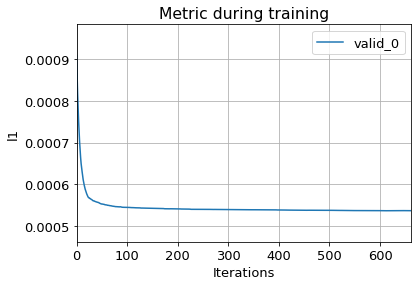

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2013-02-20 14:24:00 and 2014-03-04 09:36:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000511613
[100]	valid_0's l1: 0.000502176
[150]	valid_

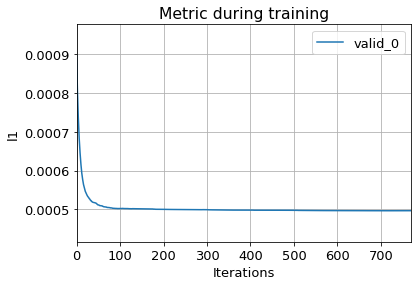

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2012-02-09 19:12:00 and 2013-02-20 14:24:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00044489
[100]	valid_0's l1: 0.00043142
[150]	valid_0'

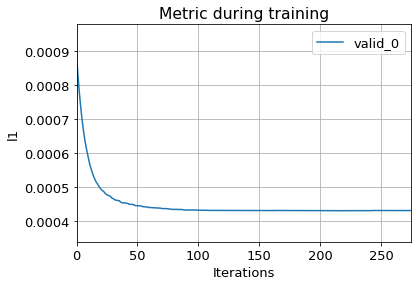

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2011-01-29 00:00:00 and 2012-02-09 19:12:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000390438
[100]	valid_0's l1: 0.000413676
Early stoppi

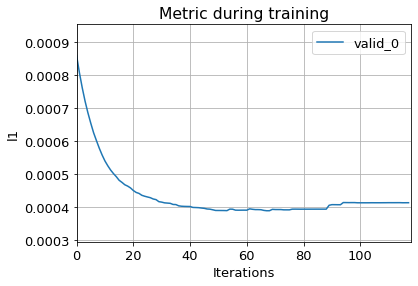

In [8]:
for level in range(10, 12+1):
    print("========== Starting level {} ==========".format(level))
    for fold in range(1, 1+5):
        print("== Starting fold {} ==".format(fold))
        # train
        model, evals_result, val = train_lightgbm_model(level, fold=fold, params=params, model_dir=model_dir)